In [1]:
s = '1111'

In [2]:
n = len(s)

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(2*n)
c = ClassicalRegister(2*n)
qc = QuantumCircuit(q,c)

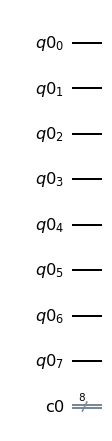

In [4]:
qc.draw('mpl')

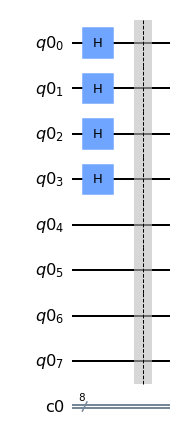

In [5]:
for i in range(n):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

In [6]:
from qiskit_textbook.tools import simon_oracle

In [7]:
qc = qc.compose(simon_oracle(s))

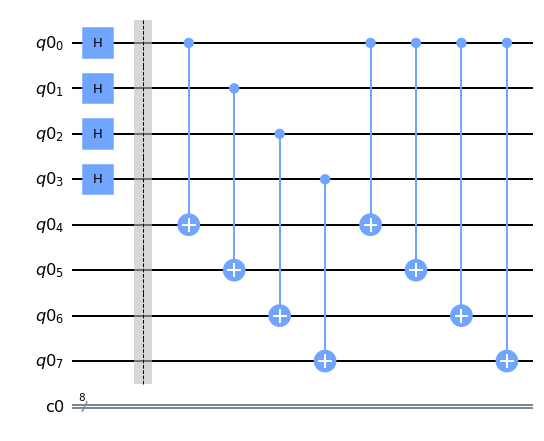

In [8]:
qc.draw('mpl')

In [9]:
qc.barrier()

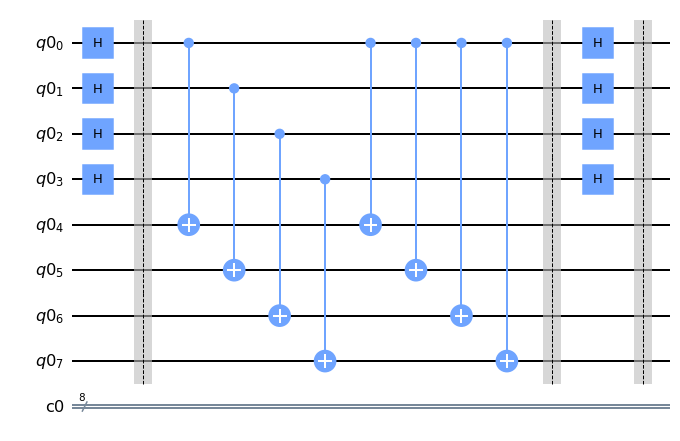

In [10]:
for i in range(n):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

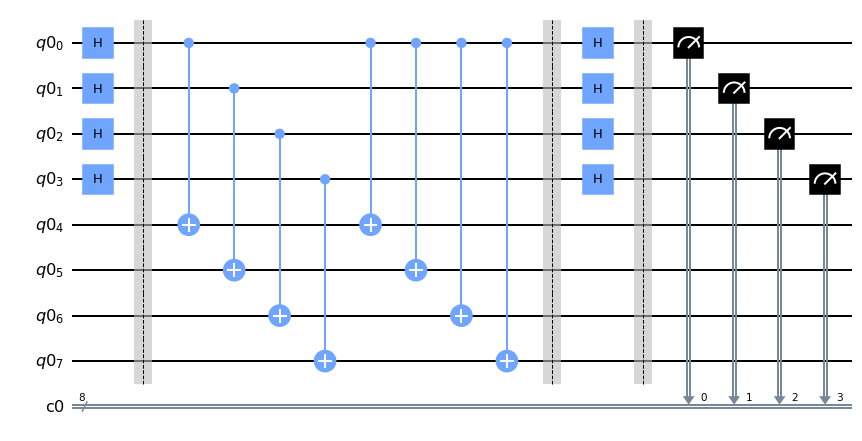

In [11]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'00000101': 130, '00001100': 111, '00000110': 118, '00001111': 154, '00001010': 115, '00000000': 140, '00000011': 130, '00001001': 126}


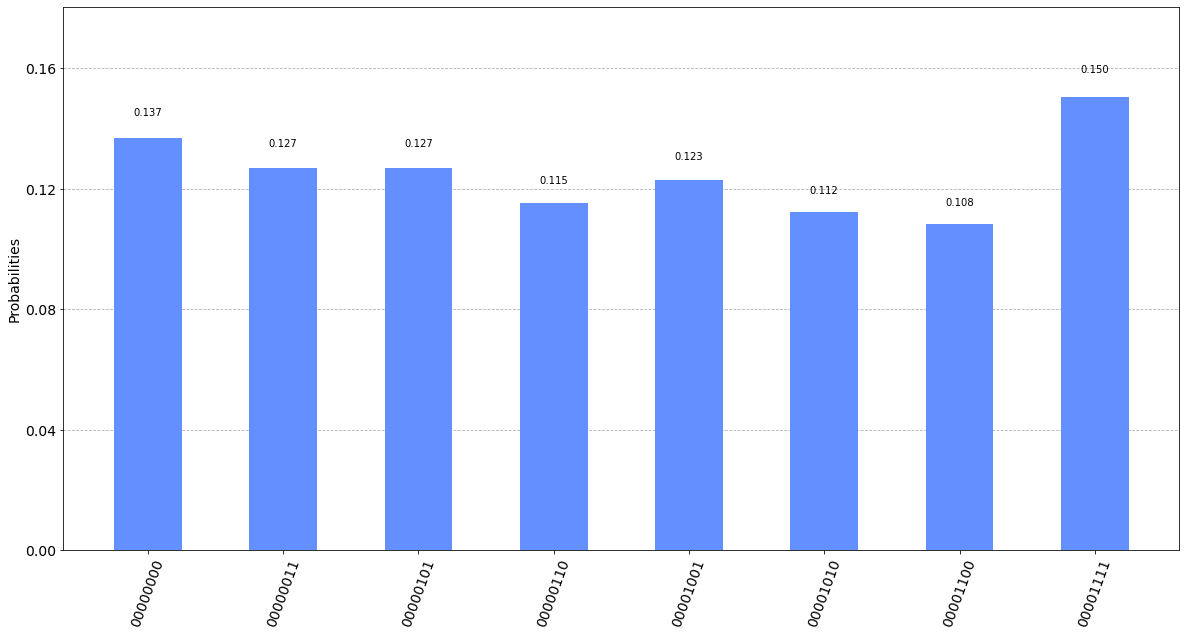

In [12]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,10))

In [13]:
from qiskit.test.mock import FakeJohannesburg
device_simulator = FakeJohannesburg()

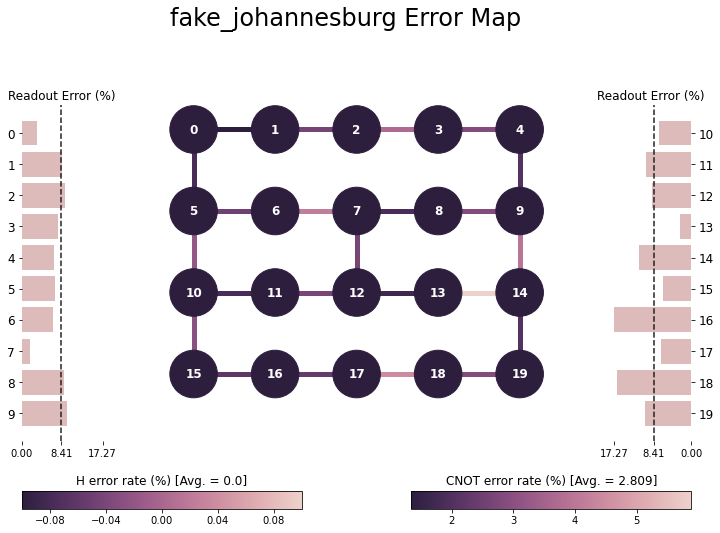

In [14]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

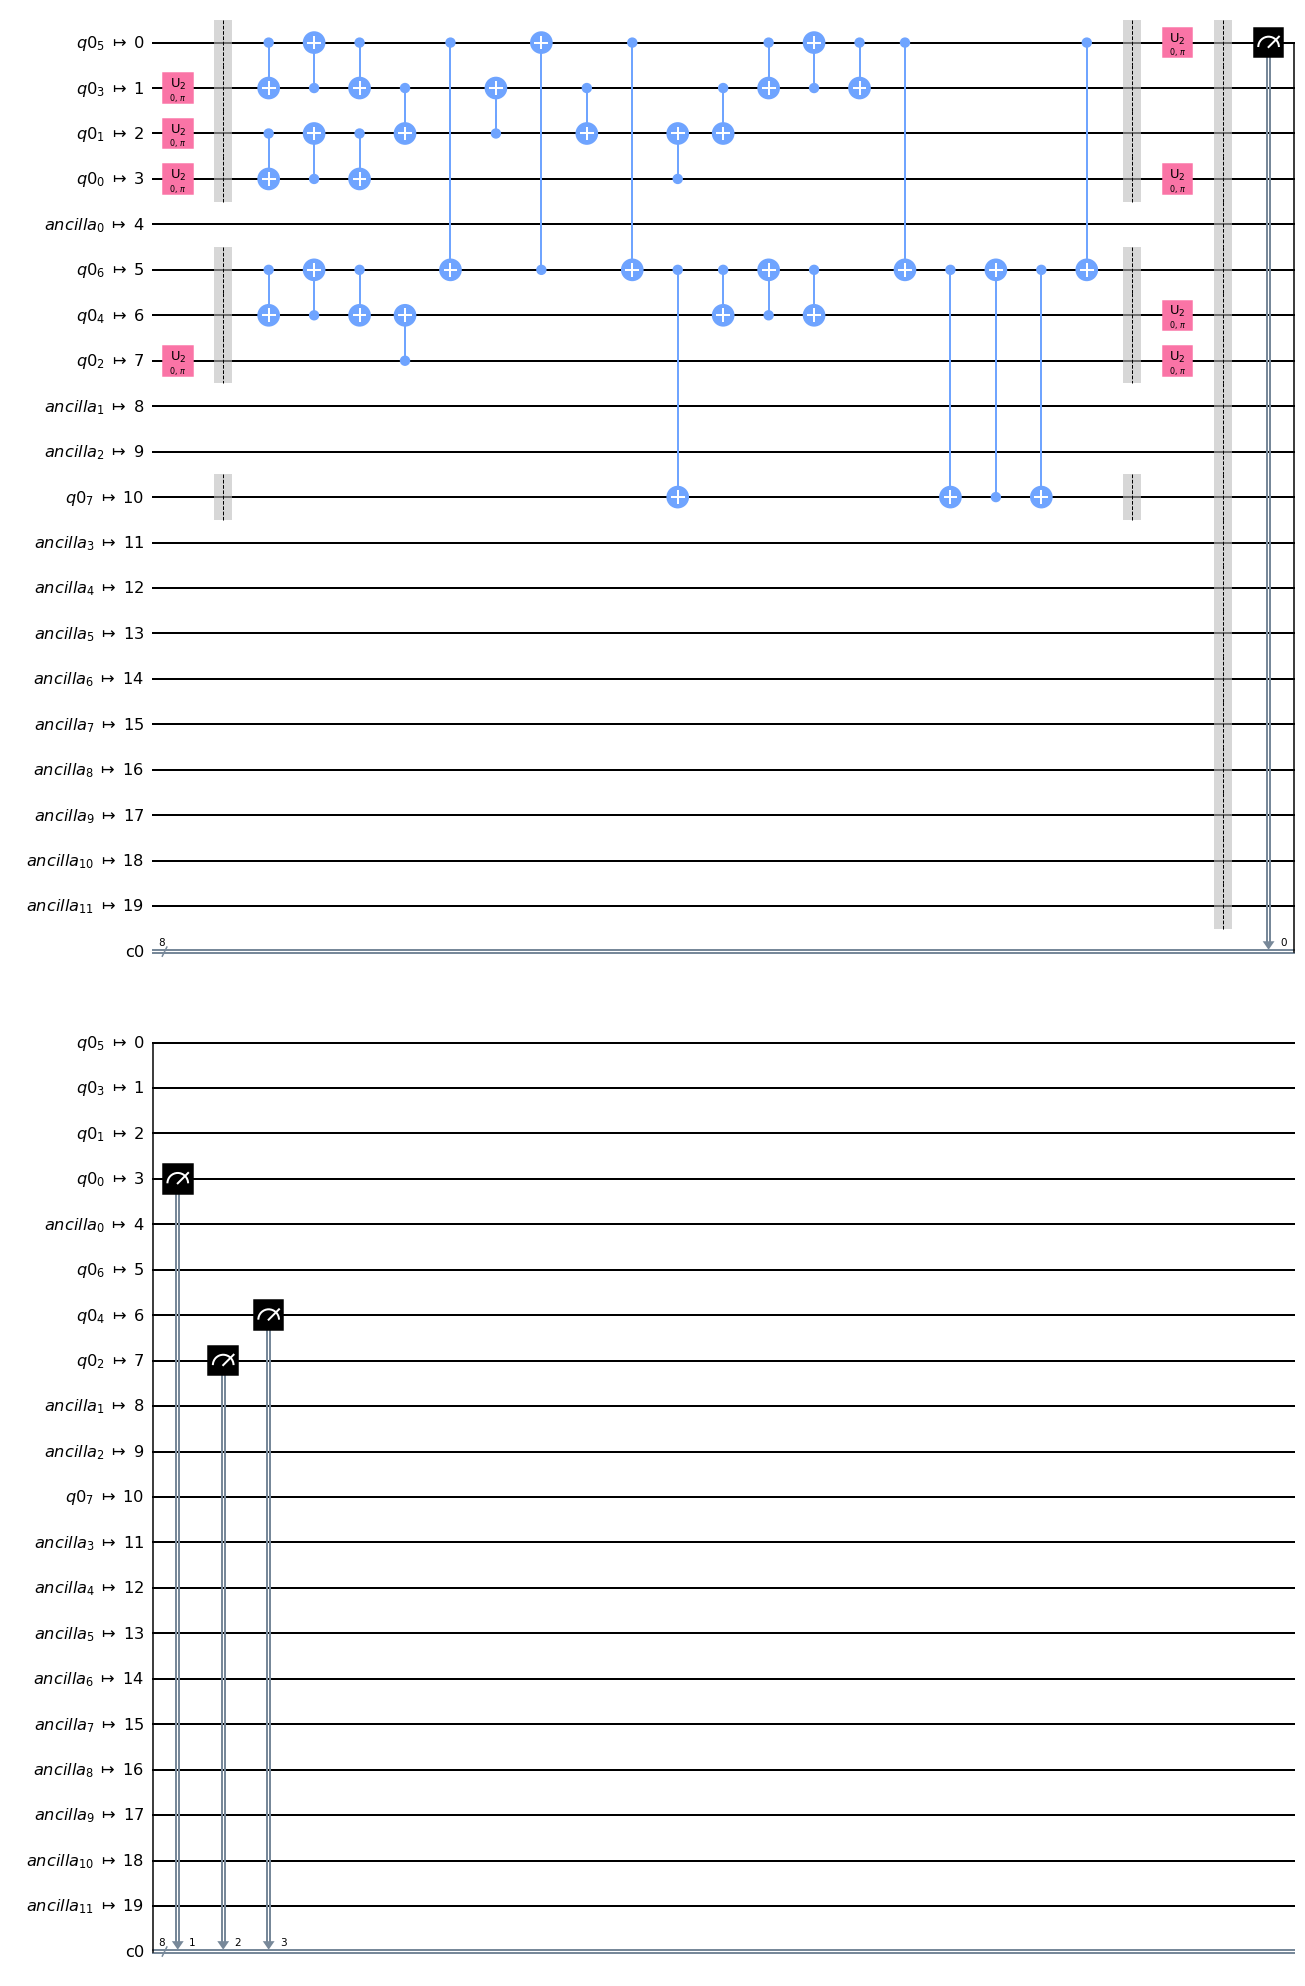

In [15]:
qc2 = transpile(qc,device_simulator)
qc2.draw('mpl')

{'00001110': 57, '00000010': 49, '00001101': 46, '00001011': 52, '00000000': 57, '00000111': 52, '00000011': 66, '00001000': 52, '00000001': 54, '00001100': 89, '00000101': 75, '00001001': 64, '00001111': 75, '00001010': 89, '00000110': 85, '00000100': 62}


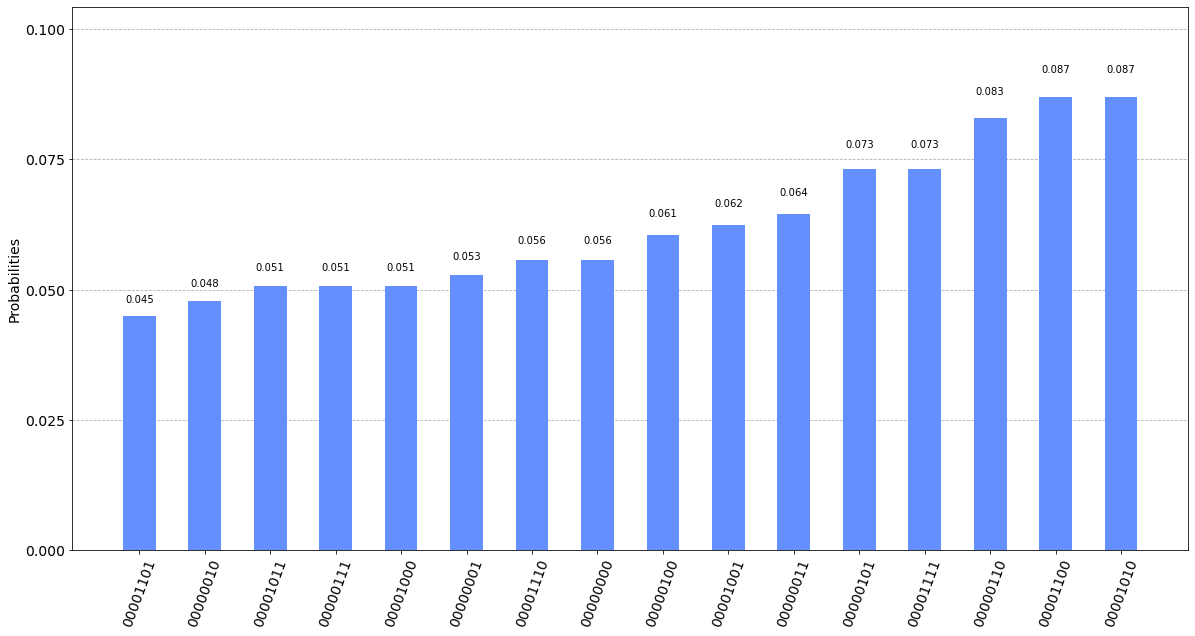

In [17]:
job = device_simulator.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,10),sort = 'value')